# Feature Selection

Feature selection is the process of selecting a subset of relevant features for use in model construction


## Top reasons to use feature selection are:
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

***Import the packages we will use for this notebook***

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")



***Set up or initial dataframe by removing variable and transforming others.***

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-051120-lectures/master/Mod_2/model_evaluation/resources/movie_dataset_us.csv', index_col=0)

In [3]:
df.dropna(subset=['duration'],inplace=True)

features=['budget', 'duration','actor_1_facebook_likes','cast_total_facebook_likes', 'PG', 'PG-13', 'R',
       'yr_old']

df_features = df[features]

target = df['gross']

In [4]:
df_features.isnull().mean()

budget                       0.0
duration                     0.0
actor_1_facebook_likes       0.0
cast_total_facebook_likes    0.0
PG                           0.0
PG-13                        0.0
R                            0.0
yr_old                       0.0
dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)


Now that I have my training and testing datasets, I am going to apply my feature scaler to the dataset.  

**Why am I scaling my data after the train-test split and not before?**



In [6]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [7]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 50868316.6605146


### Evaluate on the test set

In [8]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 45699916.418925904
Training:  50868316 vs. Testing:  45699916


***Plot the residuals after fitting a linear model***

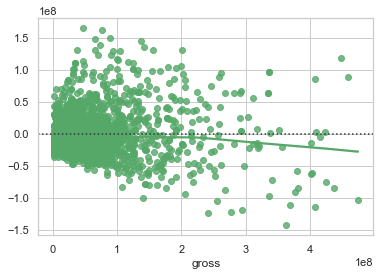

In [9]:

sns.residplot( y_train, y_train_pred,lowess=True, color="g")

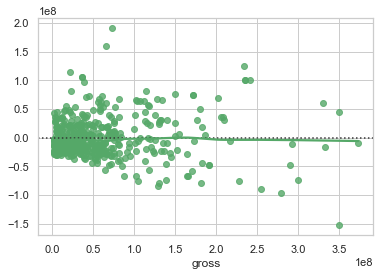

In [10]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

**Take the square root of the target data to determine if this model is more accurate**

In [11]:
#take the natural log of the target variable
y_log = np.log(y_train)

In [12]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

y_train_pred = lm_log.predict(X_train)

#exponentiate the predictions to get them on the same original scale 
y_train_pred = np.exp(y_train_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 71643876.52766189


## Use the new model to predict the test set.

In [13]:
y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 72852152.01504295
Training:  71643876 vs. Testing:  72852152


### Based on this residual plot how might we want to transform our data?

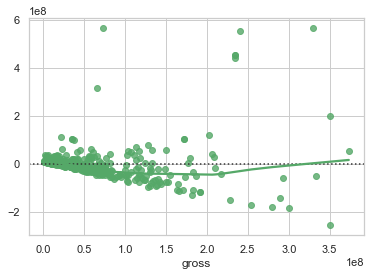

In [14]:
sns.residplot( y_test, y_test_pred, lowess=True, color="g")

## Generate Polynomial and Interaction features

In [15]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,PG,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget PG,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration PG,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes PG,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes PG,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,PG^2,PG PG-13,PG R,PG yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2
0,250000000.0,164.0,27000.0,106759.0,0.0,1.0,0.0,4.0,6.250000e+16,4.100000e+10,6.750000e+12,2.668975e+13,0.0,250000000.0,0.0,1.000000e+09,26896.0,4428000.0,17508476.0,0.0,164.0,0.0,656.0,729000000.0,2.882493e+09,0.0,27000.0,0.0,108000.0,1.139748e+10,0.0,106759.0,0.0,427036.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,16.0
1,263700000.0,132.0,640.0,1873.0,0.0,1.0,0.0,4.0,6.953769e+16,3.480840e+10,1.687680e+11,4.939101e+11,0.0,263700000.0,0.0,1.054800e+09,17424.0,84480.0,247236.0,0.0,132.0,0.0,528.0,409600.0,1.198720e+06,0.0,640.0,0.0,2560.0,3.508129e+06,0.0,1873.0,0.0,7492.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,16.0
2,258000000.0,156.0,24000.0,46055.0,0.0,1.0,0.0,9.0,6.656400e+16,4.024800e+10,6.192000e+12,1.188219e+13,0.0,258000000.0,0.0,2.322000e+09,24336.0,3744000.0,7184580.0,0.0,156.0,0.0,1404.0,576000000.0,1.105320e+09,0.0,24000.0,0.0,216000.0,2.121063e+09,0.0,46055.0,0.0,414495.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,81.0
3,260000000.0,100.0,799.0,2036.0,1.0,0.0,0.0,6.0,6.760000e+16,2.600000e+10,2.077400e+11,5.293600e+11,260000000.0,0.0,0.0,1.560000e+09,10000.0,79900.0,203600.0,100.0,0.0,0.0,600.0,638401.0,1.626764e+06,799.0,0.0,0.0,4794.0,4.145296e+06,2036.0,0.0,0.0,12216.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,36.0
4,250000000.0,141.0,26000.0,92000.0,0.0,1.0,0.0,1.0,6.250000e+16,3.525000e+10,6.500000e+12,2.300000e+13,0.0,250000000.0,0.0,2.500000e+08,19881.0,3666000.0,12972000.0,0.0,141.0,0.0,141.0,676000000.0,2.392000e+09,0.0,26000.0,0.0,26000.0,8.464000e+09,0.0,92000.0,0.0,92000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=15,test_size=0.2)


In [22]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [23]:
X_test.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,PG,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget PG,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration PG,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes PG,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes PG,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,PG^2,PG PG-13,PG R,PG yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2
0,0.218341,-0.311324,-0.587938,-0.491847,2.388522,-0.869962,-0.809579,-1.561928,-0.120239,0.075512,-0.385742,-0.290022,1.537959,-0.563824,-0.536028,-0.811267,-0.338852,-0.607863,-0.501080,2.414341,-0.847728,-0.789868,-1.471109,-0.260967,-0.307980,0.113913,-0.43483,-0.423166,-0.607437,-0.343111,0.417744,-0.461393,-0.454960,-0.670926,2.388522,0.0,0.0,-0.081518,-0.869962,0.0,-0.692118,-0.809579,-0.652493,-1.086458
1,-0.727345,-0.363975,-0.679920,-0.769378,-0.418669,-0.869962,1.235211,-1.188188,-0.492303,-0.675324,-0.477671,-0.453941,-0.322492,-0.563824,0.136481,-0.841181,-0.381896,-0.693130,-0.742442,-0.413949,-0.847728,1.056248,-1.143511,-0.264851,-0.318962,-0.227699,-0.43483,-0.316684,-0.601199,-0.367487,-0.243592,-0.461393,-0.367997,-0.685848,-0.418669,0.0,0.0,-0.356289,-0.869962,0.0,-0.692118,1.235211,-0.152254,-1.011019
2,-0.727345,-1.153725,-0.688391,-0.665838,-0.418669,-0.869962,1.235211,1.054251,-0.492303,-0.713339,-0.479008,-0.440406,-0.322492,-0.563824,0.136481,-0.426985,-0.977162,-0.710304,-0.674523,-0.413949,-0.847728,0.784761,0.468660,-0.265065,-0.317564,-0.227699,-0.43483,-0.328080,-0.523818,-0.362313,-0.243592,-0.461393,-0.225252,-0.458132,-0.418669,0.0,0.0,-0.356289,-0.869962,0.0,-0.692118,1.235211,1.848701,1.025812
3,1.801814,-0.732525,1.294470,2.025267,2.388522,-0.869962,-0.809579,-0.627578,1.484179,1.152770,2.318360,2.775419,3.847484,-0.563824,-0.536028,0.850119,-0.671445,0.976056,1.490559,2.194668,-0.847728,-0.789868,-0.717472,0.445517,0.889207,3.871638,-0.43483,-0.423166,0.535371,1.408503,5.305043,-0.461393,-0.454960,0.985728,2.388522,0.0,0.0,1.292340,-0.869962,0.0,-0.692118,-0.809579,-0.652493,-0.756415
4,-0.573396,-0.363975,0.267702,-0.017274,-0.418669,-0.869962,1.235211,0.306771,-0.461604,-0.554690,-0.252517,-0.305895,-0.322492,-0.563824,0.450318,-0.387867,-0.381896,0.169586,-0.096134,-0.413949,-0.847728,1.056248,0.173337,-0.088051,-0.147525,-0.227699,-0.43483,0.958226,0.438796,-0.223769,-0.243592,-0.461393,0.668892,0.179436,-0.418669,0.0,0.0,-0.356289,-0.869962,0.0,-0.692118,1.235211,1.181716,0.045115


In [24]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 48134101.255068116


In [25]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 49953310.28914523
Training:  48134101 vs. Testing:  49953310


**Given the difference in RMSE between our test and training sets, what can we say about this model?**

# Feature Selection

## Types of Feature Selection

* Filter Methods
* Wrapper Methods
* Embedded Methods

# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

![alt text](./resources/Filter_1.png)

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](./resources/FS1.webp)

### Removing Variables based on correlation coefficient

In [26]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,PG,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget PG,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration PG,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes PG,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes PG,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,PG^2,PG PG-13,PG R,PG yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2
budget,NaN,0.337392,0.222161,0.286266,0.178065,0.176044,0.318255,0.161591,0.936515,0.965789,0.641378,0.644899,0.415983,0.672253,0.064773,0.645920,0.328589,0.277577,0.337015,0.186798,0.251852,0.274408,0.071375,0.083399,0.137442,0.214744,0.257066,0.112246,0.092119,0.212127,0.228956,0.308838,0.116589,0.114306,0.178065,NaN,NaN,0.095678,0.176044,NaN,0.052741,0.318255,0.256110,0.145265
duration,NaN,NaN,0.160999,0.205018,0.172683,0.108821,0.055974,0.045842,0.304206,0.504942,0.255282,0.269996,0.102977,0.318990,0.251131,0.248035,0.983142,0.304862,0.349482,0.127751,0.256292,0.194534,0.251639,0.022816,0.059743,0.071239,0.146474,0.126761,0.120864,0.112013,0.078555,0.181695,0.148522,0.147807,0.172683,NaN,NaN,0.153608,0.108821,NaN,0.040355,0.055974,0.058143,0.021424
actor_1_facebook_likes,NaN,NaN,NaN,0.921077,0.002403,0.009533,0.028629,0.088644,0.200115,0.226383,0.661547,0.564090,0.087993,0.124029,0.100938,0.118678,0.148650,0.974314,0.866650,0.008300,0.013631,0.052846,0.038280,0.792166,0.838349,0.354077,0.551237,0.555174,0.810403,0.820803,0.323295,0.484846,0.507646,0.751173,0.002403,NaN,NaN,0.011257,0.009533,NaN,0.058772,0.028629,0.001032,0.084794
cast_total_facebook_likes,NaN,NaN,NaN,NaN,0.003660,0.017694,0.000849,0.120287,0.268989,0.297958,0.696435,0.710848,0.096983,0.189737,0.092626,0.125439,0.191428,0.921816,0.972645,0.009506,0.050396,0.030019,0.060919,0.663908,0.775739,0.332941,0.535150,0.480137,0.707922,0.877061,0.342812,0.581656,0.496751,0.754759,0.003660,NaN,NaN,0.010831,0.017694,NaN,0.063238,0.000849,0.022882,0.111328
PG,NaN,NaN,NaN,NaN,NaN,0.364226,0.338945,0.051959,0.139739,0.099457,0.101178,0.085213,0.770279,0.236056,0.224418,0.109396,0.158802,0.026074,0.028550,0.988727,0.354917,0.330693,0.093824,0.013677,0.017426,0.543864,0.182050,0.177166,0.011989,0.017409,0.581826,0.193171,0.190478,0.007159,1.000000,NaN,NaN,0.851004,0.364226,NaN,0.289769,0.338945,0.273179,0.063692
PG-13,NaN,NaN,NaN,NaN,NaN,NaN,0.704302,0.061094,0.152596,0.194929,0.086779,0.105510,0.280556,0.648102,0.466324,0.104850,0.098102,0.004154,0.034446,0.360120,0.974443,0.687155,0.036956,0.008796,0.001702,0.198089,0.499827,0.368138,0.046940,0.017416,0.211916,0.530360,0.395798,0.042011,0.364226,NaN,NaN,0.309958,1.000000,NaN,0.795574,0.704302,0.567644,0.072965
R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079440,0.264928,0.269386,0.153164,0.160003,0.261083,0.456460,0.662107,0.208332,0.050638,0.038395,0.009469,0.335125,0.686302,0.975653,0.102660,0.009437,0.001626,0.184340,0.352029,0.522699,0.067662,0.015687,0.197207,0.373534,0.561972,0.058594,0.338945,NaN,NaN,0.288444,0.704302,NaN,0.560324,1.000000,0.805967,0.101528
yr_old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187719,0.156659,0.143131,0.162905,0.095428,0.134385,0.053496,0.448978,0.036169,0.093194,0.122908,0.053733,0.075751,0.082526,0.940696,0.034754,0.057302,0.046317,0.102693,0.008288,0.302038,0.090980,0.048647,0.133852,0.008231,0.332621,0.051959,NaN,NaN,0.143347,0.061094,NaN,0.334898,0.079440,0.456734,0.967941
budget^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934099,0.649386,0.669308,0.380019,0.677133,0.018293,0.514363,0.300226,0.255081,0.321909,0.151520,0.231039,0.240120,0.114394,0.086079,0.141704,0.197007,0.245017,0.116862,0.054800,0.220932,0.214310,0.303114,0.122456,0.074897,0.139739,NaN,Na

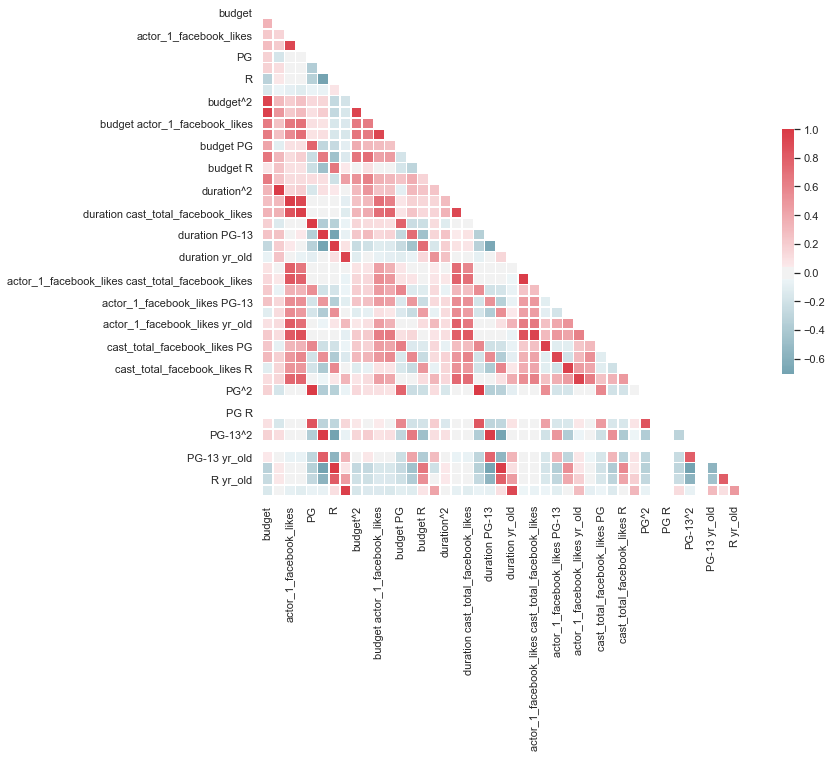

In [27]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
len(X_train.columns)

44

In [29]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=False)
X_test.drop(columns=to_drop, inplace=False)


,budget,duration,actor_1_facebook_likes,PG,PG-13,R,yr_old,budget actor_1_facebook_likes,budget PG,budget PG-13,budget R,budget yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes PG,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,PG PG-13,PG R,PG yr_old,PG-13 R,PG-13 yr_old,R yr_old
0,0.218341,-0.311324,-0.587938,2.388522,-0.869962,-0.809579,-1.561928,-0.385742,1.537959,-0.563824,-0.536028,-0.811267,-0.260967,0.113913,-0.434830,-0.423166,-0.607437,0.0,0.0,-0.081518,0.0,-0.692118,-0.652493
1,-0.727345,-0.363975,-0.679920,-0.418669,-0.869962,1.235211,-1.188188,-0.477671,-0.322492,-0.563824,0.136481,-0.841181,-0.264851,-0.227699,-0.434830,-0.316684,-0.601199,0.0,0.0,-0.356289,0.0,-0.692118,-0.152254
2,-0.727345,-1.153725,-0.688391,-0.418669,-0.869962,1.235211,1.054251,-0.479008,-0.322492,-0.563824,0.136481,-0.426985,-0.265065,-0.227699,-0.434830,-0.328080,-0.523818,0.0,0.0,-0.356289,0.0,-0.692118,1.848701
3,1.801814,-0.732525,1.294470,2.388522,-0.869962,-0.809579,-0.627578,2.318360,3.847484,-0.563824,-0.536028,0.850119,0.445517,3.871638,-0.434830,-0.423166,0.535371,0.0,0.0,1.292340,0.0,-0.692118,-0.652493
4,-0.573396,-0.363975,0.267702,-0.418669,-0.869962,1.235211,0.306771,-0.252517,-0.322492,-0.563824,0.450318,-0.387867,-0.088051,-0.227699,-0.434830,0.958226,0.438796,0.0,0.0,-0.356289,0.0,-0.692118,1.181716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,-0.705352,-1.206375,-0.687792,-0.418669,1.149476,-0.809579,0.680511,-0.478164,-0.322492,-0.198194,-0.536028,-0.466104,-0.265050,-0.227699,-0.338664,-0.423166,-0.536381,0.0,0.0,-0.356289,0.0,1.633047,-0.652493
462,-1.035242,-1.364326,-0.698573,-0.418669,-0.869962,1.235211,-1.375058,-0.489525,-0.322492,-0.563824,-0.491194,-0.940128,-0.265290,-0.227699,-0.434830,-0.341779,-0.612153,0.0,0.0,-0.356289,0.0,-0.692118,-0.319001
463,0.042399,-0.732525,0.781086,-0.418669,-0.869962,1.235211,-0.440708,0.319989,-0.322492,-0.563824,1.705667,-0.139349,0.134269,-0.227699,-0.434830,1.648922,0.390508,0.0,0.0,-0.356289,0.0,-0.692118,0.514731
464,-0.177528,-1.416976,13.273432,-0.418669,-0.869962,1.235211,-0.440708,5.414934,-0.322492,-0.563824,1.257328,-0.300425,32.953683,-0.227699,-0.434830,18.455861,8.615506,0.0,0.0,-0.356289,0.0,-0.692118,0.514731


In [30]:
to_drop

['cast_total_facebook_likes',
 'budget^2',
 'budget duration',
 'budget cast_total_facebook_likes',
 'duration^2',
 'duration actor_1_facebook_likes',
 'duration cast_total_facebook_likes',
 'duration PG',
 'duration PG-13',
 'duration R',
 'duration yr_old',
 'actor_1_facebook_likes cast_total_facebook_likes',
 'cast_total_facebook_likes^2',
 'cast_total_facebook_likes PG',
 'cast_total_facebook_likes PG-13',
 'cast_total_facebook_likes R',
 'cast_total_facebook_likes yr_old',
 'PG^2',
 'PG-13^2',
 'R^2',
 'yr_old^2']

## Variance Inflation Factor (VIF) 

VIFis a measure of colinearity among predictor variables within a multiple regression. The variance inflation factor for the estimated regression coefficient $b_j$ — denoted $VIF_j$ —is just the factor by which the variance of $b_j$ is "inflated" by the existence of correlation among the predictor variables in the model.In particular, the variance inflation factor for the jth predictor is:

$$VIF_j=\frac{1}{1-R_{j}^{2}}$$


where $R^2_j$  is the $R^2$-value obtained by regressing the jth predictor on the remaining predictors. 


Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

https://online.stat.psu.edu/stat462/node/180/

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [32]:
[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[89.97946773571388,
 126.75233697013589,
 3602.9194509135637,
 4159.740862864608,
 inf,
 inf,
 inf,
 121.82896088065934,
 17.907601133460837,
 76.82451089449,
 38.15584139123774,
 54.52066079138703,
 26.607620596707225,
 51.157692951510214,
 15.53033526712818,
 6.2873150851807775,
 40.98231597247829,
 425.0552444238628,
 444.95174690950375,
 421.5158684023749,
 947.7885099156589,
 906.5971575734906,
 50.13321105664149,
 397.0706580201711,
 1172.1449606256883,
 843.213342735874,
 1839.682134850653,
 1856.9048363660465,
 41.98013006502345,
 309.9889353506296,
 1050.8123411675092,
 2502.8063302108353,
 2081.4403280698657,
 39.69815761601048,
 inf,
 nan,
 nan,
 38.73937599672369,
 inf,
 nan,
 86.67020579684187,
 inf,
 101.34029206475454,
 17.136336595844117]

In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

,VIF Factor,features
0,3.1,budget
1,28.1,duration
2,10.7,actor_1_facebook_likes
3,11.6,cast_total_facebook_likes
4,3.9,PG
5,10.6,PG-13
6,10.6,R
7,4.0,yr_old


In [36]:
df_features.corrwith(target).abs()


budget                       0.667271
duration                     0.275608
actor_1_facebook_likes       0.189037
cast_total_facebook_likes    0.278309
PG                           0.130713
PG-13                        0.127014
R                            0.248622
yr_old                       0.119039
dtype: float64

###  F Test

F Test is a statistical test used to compare between models and check if the difference is significant between the model.

F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.

The least square errors in both the models are compared and checks if the difference in errors between model X and Y are significant or introduced by chance.

F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.

Scikit learn provides the Selecting K best features using F-Test.

***I am using the F-test to select the 10 top varaibles for this model***

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)

selector.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=15, score_func=<function f_regression at 0x1a23c5d9d8>)

In [38]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [39]:
list(removed_columns)

['actor_1_facebook_likes',
 'PG',
 'PG-13',
 'yr_old',
 'budget R',
 'duration actor_1_facebook_likes',
 'duration PG',
 'duration PG-13',
 'duration R',
 'duration yr_old',
 'actor_1_facebook_likes^2',
 'actor_1_facebook_likes cast_total_facebook_likes',
 'actor_1_facebook_likes PG',
 'actor_1_facebook_likes PG-13',
 'actor_1_facebook_likes R',
 'actor_1_facebook_likes yr_old',
 'cast_total_facebook_likes^2',
 'cast_total_facebook_likes PG',
 'cast_total_facebook_likes R',
 'cast_total_facebook_likes yr_old',
 'PG^2',
 'PG PG-13',
 'PG R',
 'PG yr_old',
 'PG-13^2',
 'PG-13 R',
 'PG-13 yr_old',
 'R yr_old',
 'yr_old^2']

In [40]:
list(selected_columns)

['budget',
 'duration',
 'cast_total_facebook_likes',
 'R',
 'budget^2',
 'budget duration',
 'budget actor_1_facebook_likes',
 'budget cast_total_facebook_likes',
 'budget PG',
 'budget PG-13',
 'budget yr_old',
 'duration^2',
 'duration cast_total_facebook_likes',
 'cast_total_facebook_likes PG-13',
 'R^2']

In [41]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 49558013.96189604
Testing Root Mean Squared Error: 49007498.86068837
Original:  49953310.28914523 vs. KBest:  49007498.86068837


# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

Wrapper Methods promises you a best set of features with a extensive greedy search.

But the main drawbacks of wrapper methods is the sheer amount of models that needs to be trained. It is computationally very expensive and is infeasible with large number of features.



![alt text](./resources/Wrapper_1.webp)

### Recursive Feature Elimination

An example if a wrapper method is the recursive feature elimination algorithm.

As the name suggests, this method eliminates worst performing features on a particular model one after the other until the best subset of features are known.


Recursive elimination eliminates the least explaining features one after the other.
For data with n features,

- On first round ‘n-1’ models are created with combination of all features except one. The least performing feature is removed

- On second round ‘n-2’ models are created by removing another feature.



<img src='./resources/rfe_graph.png' width=500/>

In [42]:
from sklearn.feature_selection import RFECV

In [43]:
ols = linear_model.LinearRegression()

In [44]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [45]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [46]:
list(removed_rfe)

['PG PG-13', 'PG R', 'PG-13 R', 'yr_old^2']

In [47]:
len(list(selected_rfe))

40

In [48]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 48134540.03061216
Testing Root Mean Squared Error: 49975190.63223594
Original:  49953310.28914523 vs. KBest:  49007498.86068837 vs. RFE:  49975190.63223594


# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](./resources/Embedded_1.webp)

In [49]:

X_train.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,PG,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget PG,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration PG,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes PG,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes PG,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,PG^2,PG PG-13,PG R,PG yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2
0,-0.997855,-1.522276,-0.754788,-0.828429,-0.418669,-0.869962,1.235211,0.493641,-0.518108,-0.897331,-0.490039,-0.462092,-0.322492,-0.563824,-0.414976,-0.870175,-1.222617,-0.762131,-0.793932,-0.413949,-0.847728,0.658066,-0.088096,-0.265904,-0.319987,-0.227699,-0.434830,-0.417410,-0.618704,-0.368350,-0.243592,-0.461393,-0.449408,-0.699738,-0.418669,0.0,0.0,-0.356289,-0.869962,0.0,-0.692118,1.235211,1.348462,0.262000
1,0.746165,0.215176,0.182138,0.016000,-0.418669,1.149476,-0.809579,0.306771,0.278021,0.631713,0.321790,0.144136,-0.322492,1.310029,-0.536028,1.130852,0.114684,0.184097,0.011089,-0.413949,1.150354,-0.789868,0.368605,-0.116459,-0.155444,-0.227699,0.835069,-0.423166,0.350269,-0.211725,-0.243592,0.604187,-0.454960,0.215516,-0.418669,0.0,0.0,-0.356289,1.149476,0.0,1.275329,-0.809579,-0.652493,0.045115
2,1.361961,1.057577,0.353266,0.032606,-0.418669,1.149476,-0.809579,-0.066968,0.915237,1.463648,0.797078,0.367092,-0.322492,1.949882,-0.536028,1.333348,0.927689,0.515543,0.143506,-0.413949,1.433269,-0.789868,0.236275,-0.057173,-0.121720,-0.227699,1.065959,-0.423166,0.318077,-0.205534,-0.243592,0.625042,-0.454960,0.062973,-0.418669,0.0,0.0,-0.356289,1.149476,0.0,0.917611,-0.809579,-0.652493,-0.332076
3,-0.727345,-0.100724,-0.682658,-0.705804,-0.418669,-0.869962,1.235211,1.801730,-0.492303,-0.662652,-0.478103,-0.445631,-0.322492,-0.563824,0.136481,-0.288920,-0.162477,-0.692213,-0.682476,-0.413949,-0.847728,1.146744,1.643495,-0.264923,-0.317996,-0.227699,-0.434830,-0.320367,-0.486983,-0.364863,-0.243592,-0.461393,-0.280351,-0.467288,-0.418669,0.0,0.0,-0.356289,-0.869962,0.0,-0.692118,1.235211,2.515686,2.308261
4,2.241668,0.531076,0.952214,1.649401,-0.418669,1.149476,-0.809579,-0.440708,2.147945,2.082023,2.210340,2.782169,-0.322492,2.863956,-0.536028,1.471413,0.406963,1.052426,1.691552,-0.413949,1.256447,-0.789868,-0.293047,0.228138,0.555140,-0.227699,1.874077,-0.423166,0.503180,0.971834,-0.243592,2.655581,-0.454960,1.008071,-0.418669,0.0,0.0,-0.356289,1.149476,0.0,0.559893,-0.809579,-0.652493,-0.633828


***Plot to compare the size of all of our coefficients***

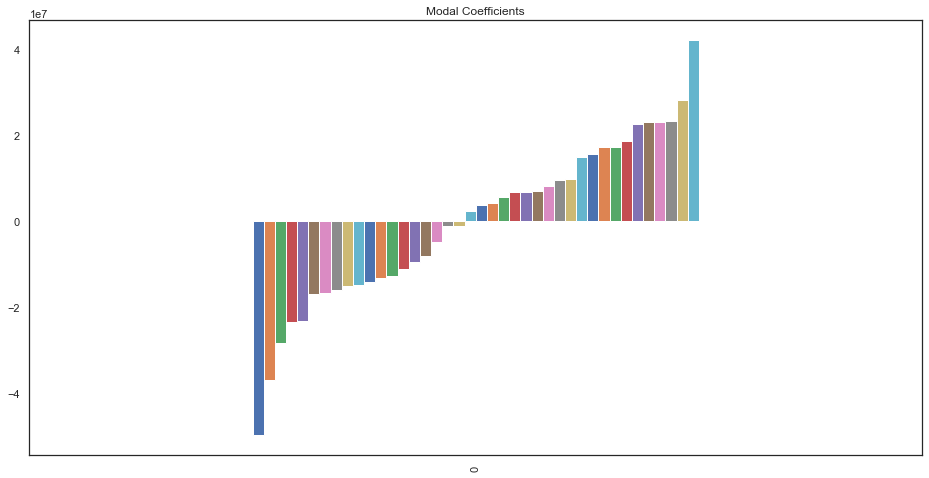

In [50]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [51]:
coef.T

,0
budget,2.312143e+07
duration,2.808241e+07
actor_1_facebook_likes,1.555232e+07
cast_total_facebook_likes,5.560787e+06
PG,2.289277e+07
PG-13,6.637499e+06
R,1.711704e+07
yr_old,-1.177690e+06
budget^2,-4.853595e+06
budget duration,4.199098e+07


In [52]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )




Training Error: 32745486.71008615
Testing Error: 49774913.95586277


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1598113752841467e+18, tolerance: 908219052183996.6
  positive)


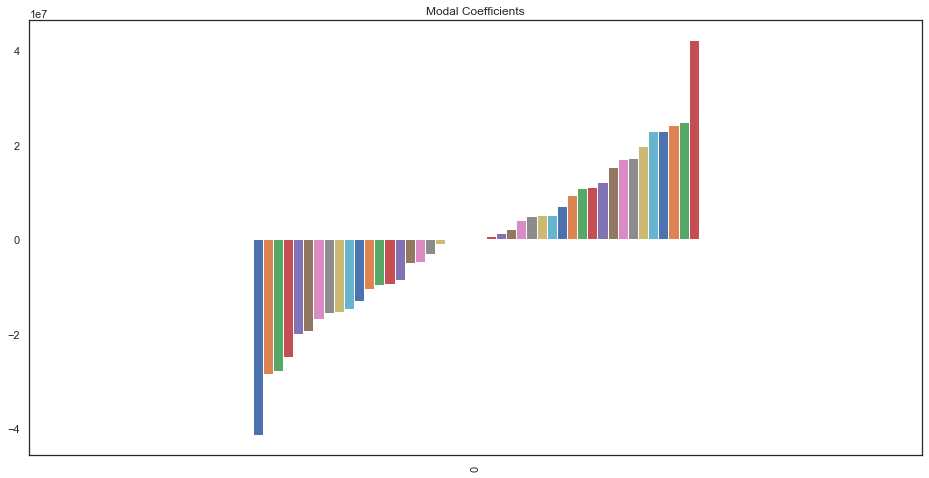

In [53]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [54]:
lasso_coef01.T

,0
duration PG,-4.152089e+07
budget PG-13,-2.845840e+07
actor_1_facebook_likes PG-13,-2.793486e+07
duration R,-2.495471e+07
actor_1_facebook_likes PG,-2.014160e+07
actor_1_facebook_likes R,-1.942484e+07
budget R,-1.686439e+07
PG-13^2,-1.567148e+07
duration^2,-1.544568e+07
budget actor_1_facebook_likes,-1.479209e+07


In [55]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )



Training Error: 32745486.57016778
Testing Error: 49774913.2927189


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1597769068201644e+18, tolerance: 908219052183996.6
  positive)


In [56]:
lasso_coef1 = pd.DataFrame(data=lasso1.coef_).T
lasso_coef1.columns = X_train.columns

In [57]:
lasso_coef1.T

,0
budget,2.291830e+07
duration,2.423887e+07
actor_1_facebook_likes,1.972738e+07
cast_total_facebook_likes,1.244544e+06
PG,1.219743e+07
PG-13,1.704695e+07
R,-2.449498e+05
yr_old,-3.151725e+06
budget^2,-4.830258e+06
budget duration,4.217088e+07


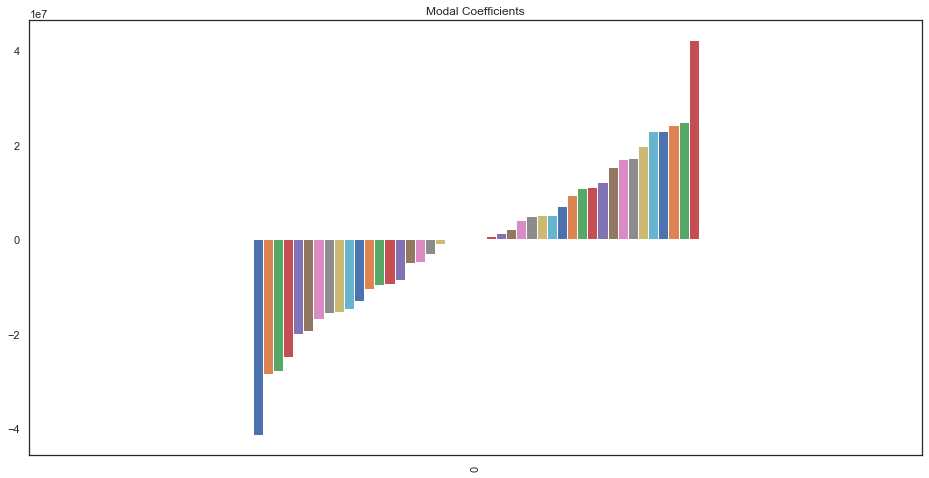

In [58]:

lasso_coef1 = lasso_coef1.T.sort_values(by=0).T
lasso_coef1.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

## Application: when do we use which method?

Lasso probably appears to be the easiest method to use to select the features of your model. So why would you bother with any of the other methods?  

A Lasso algorithm is only for linear models, and you might rather use a different machine learning algorithm like K-Nearest Neighbors. Therefore, a filter or wrapper method could be used to perform your feature selection.

You might start off with hundreds or thousands of features that you want to select from. This could take a while to run a wrapper or embedded method, so you can use a filter method first to reduce your model size and have it run more quickly.  

Finally you can also combine these methods together. So you might start with a filter method to remove some of the features that are obviously non-impactful to our target variable, then run a wrapper or embedded method to finish the process. 

## Final Model:
    
After we have identified the model that performs the best, we want to go back and fit it to all available data.  